# Signal Processing
## Week \#2 Lab

### Introduction

We discussed ensemble averages in class which applies probabilty theory to random signals but in practical situations we will have a finite number of sequences, or perhaps only a single realiation of the random process. For ergodic processes, time averages (over all time) are equal to the statistical averages. Since we don't have infinite length sequences, we can compute estimates of the mean, variance, and autocorrrelation from one finite-length realization of the random process. In this lab we create random signals using the uniform and Gaussian distributions. We explore the autocorrelation and power power spectral density (psd) of random signals. The autocorrelation is used to find a periodic signal that is buried in noise.

### Install Python Packages

Import the necessary Python modules for implementing the lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write

### Create Random Number Generator


Here we create the random generator object for use throughout this lab. If you would like reproducible results, you can seed the random generator by passing a seed value to default_rng().

In [2]:
rng = np.random.default_rng()

### Random Signals

#### Uniform Noise

A uniform random process is a sequence of random variables with a uniform distribution in which the outcomes are equally likely. These outcomes are contstrained a known interval and the density function is:

\begin{equation*}
p_x(x) =
    \begin{cases}
        \frac{1}{b-a}, & a\leq x \leq b \\
        0, & \text{otherwise}
    \end{cases}
\end{equation*}

The following is a realization of a sequence of uniform random noise.

0.500494854323484
0.2917125093327439


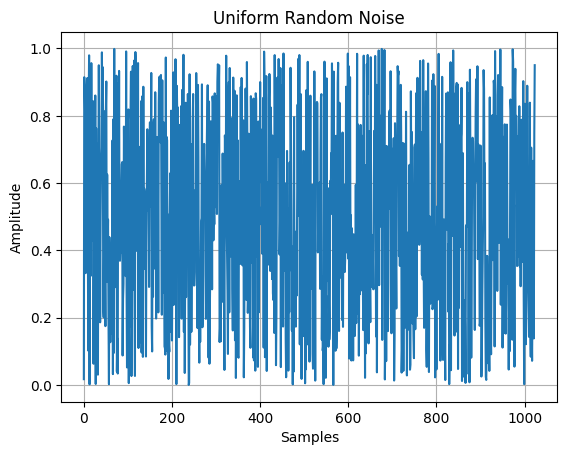

In [3]:
# Generate uniform noise
v = rng.uniform(0,1,1024)

# Verify mean and standard deviation
print(np.mean(v))
print(np.std(v))

# Plot results
plt.plot(v)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Uniform Random Noise')
plt.grid()


#### Guassian Noise

A Gaussian random process is a sequence of random variables with a Gaussian or normal distribution. A Gaussian random variable with mean $m_x$ and variance $\sigma^2$ has the following probability density function:

\begin{equation*}
p_x(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-(x-m_x)^2/2\sigma^2}
\end{equation*}

In the following, we create a random Gaussian process and use a realization of the process to plot a histogram of the samples with an overlay of the denisty function, determine the autocorrelation, and plot the power spectral density. Since the samples of the process are zero mean and uncorrelated, we expect an autocorrelation that is the variance at zero lag and zero elsewhere which leads to a power spectral density that is flat across all frequencies.

0.06417043391382642
1.2125524944693444


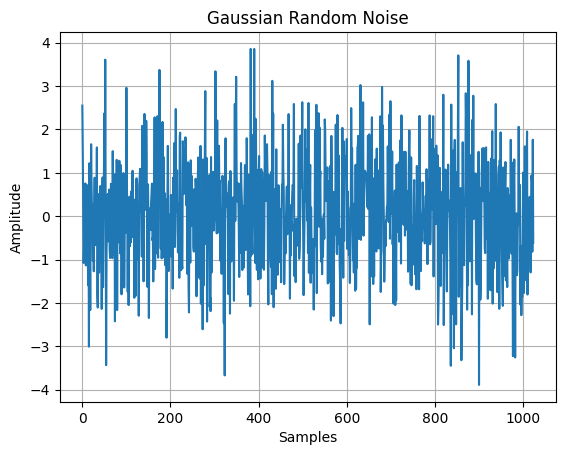

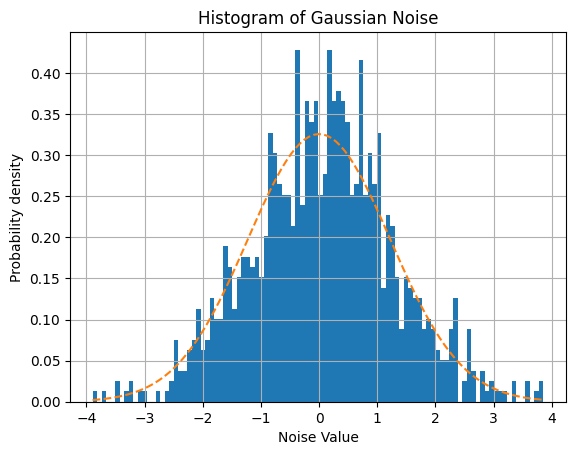

In [4]:
# Generate random process with independent and identically distributed (iid) samples with Gaussian distribution

mu = 0 # define mean
sigma2 = 1.5 # define noise variance
sigma = np.sqrt(sigma2) #  noise standard deviation
v = rng.normal(mu, sigma, 1024)

# Verify mean and standard deviation from samples
print(np.mean(v))
print(np.std(v))

# Plot noise
plt.plot(v)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Gaussian Random Noise')
plt.grid()

# Plot histogram of Gaussian noise
fig, ax = plt.subplots()
n, bins, patches = ax.hist(v,100,density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Noise Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of Gaussian Noise');
ax.grid()

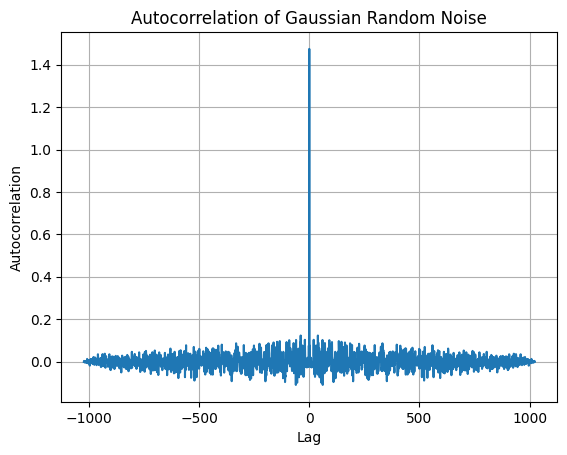

In [5]:
# Compute and plot the autocorrelation of the Guassian noise
# The autocorrelation is scaled by the size of the signal so lag zero is the variance
vautocorr = signal.correlate(v,v)/v.size
lags = signal.correlation_lags(v.size, v.size)
fig, ax = plt.subplots()
ax.plot(lags,vautocorr)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
ax.set_title("Autocorrelation of Gaussian Random Noise")
ax.grid()

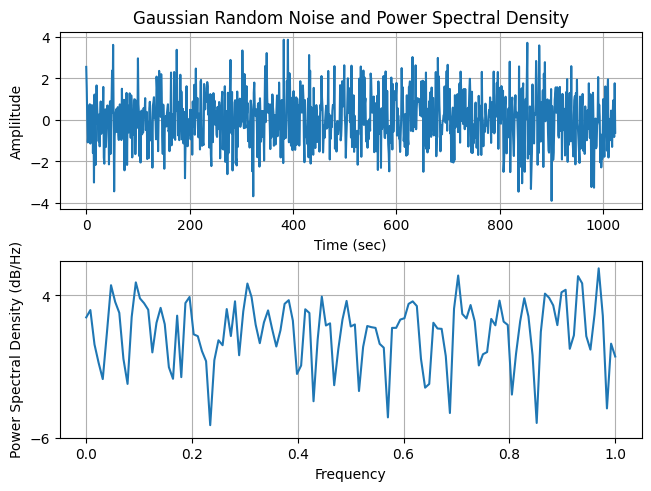

In [6]:
# Compute and plot the power spectral density of Guassian noise
fig, (ax0, ax1) = plt.subplots(2,1,layout='constrained')
ax0.plot(v)
ax0.set_xlabel("Time (sec)")
ax0.set_ylabel("Ampliltude")
ax0.set_title("Gaussian Random Noise and Power Spectral Density")
ax0.grid()
ax1.psd(v);


#### Creating a Sound File

Below, we create a two-second Gaussian .wav file to hear this Gaussian noise.

In [7]:
# Create two-second Gaussian noise WAV file at Fs=10 kHz
mu = 0 # define mean
sigma2 = 1 # define noise variance
sigma = np.sqrt(sigma2) # calculate noise standard deviation
Fs = 10000 # sample rate
samples = 2*Fs
noise = rng.normal(mu, sigma, samples)
amplitude = np.iinfo(np.int16).max # returns max in range of int16 data type
data = amplitude * noise # ensures amplitude of data covers entire range of data type
write("lab2gaussian.wav", Fs, data.astype(np.int16))

### Exercise

1. Create and and plot a realization of the following random signal using the Gaussian noise vector from above and a frequency of $f=0.2$ cycles per sample. With 1024 samples, this will give about 200 cycles of the cosine in this finite length signal.

    \begin{equation*}
    x[n] = \cos(2\pi fn+\theta) + v[n]
    \end{equation*}

    where $\theta$ is a uniform random variable distributed between $0$ and $2\pi$ and $v[n]$ is a Gaussian random process. Can you tell that the signal plus noise is periodic from the plot, or is the sinusoid buried in the noise?
    
2. Compute and plot the autocorrelation from the samples. Verify that there is a periodic component in the autocorrelation function. You may need to only plot several hundred samples around zero lag, the center of the autocorrelation vector. How can you recover the period (or frequency) of the original signal from the periodic nature of the autorcorrelation function?
3. Plot the power spectral density. Can you identify the signal from the noise? What happens to the PSD as the frequency of the sinuoid is changed? The PSD frequency axis is normalized from zero to one where one represents half the sample frequency or $F_s/2$ or also discrete-time frequency of 1/2.
4. Create a 2-second realization of this signal and save as a .wav file. Are you able to hear the cosine within the noise? You probably won't be able to here it since it is buried in the noise. If you dramatically reduce the noise, you will be able to hear the sinusoid.

# Exercise 1

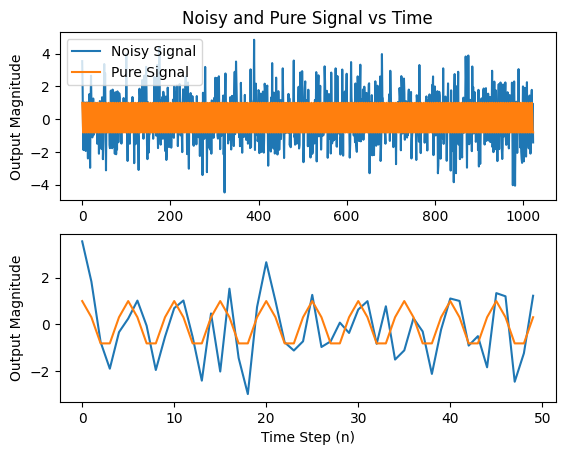

In [8]:
# Define parameters
f = 0.2
n = np.array(list(range(1024)))
zoom_cycles = 10

# Get pure signal
x_pure = np.cos(2 * np.pi * f * n)

# Get noisy signal
x = x_pure + v

# Plotting
plt.figure(0)
plt.subplot(211)
plt.plot(x)
plt.plot(x_pure)
plt.ylabel("Output Magnitude")
plt.title("Noisy and Pure Signal vs Time")
plt.legend(['Noisy Signal', 'Pure Signal'])
plt.subplot(212)
plt.plot(x[0:int(zoom_cycles/f)])
plt.plot(x_pure[0:int(zoom_cycles/f)])
plt.xlabel("Time Step (n)")
plt.ylabel("Output Magnitude")
plt.show()

Looking at the whole signal, it is really hard to see any of the periodicity.  However, when zooming in on the first 10 oscillations, it is easier to see that the signal is periodic.  That being said, the noise does significantly impact the fidelity of the signal, and if we didn't have the true signal frequency to plot on top of it, it would be much harder to discern the periodicity from noise.

# Exercise 2

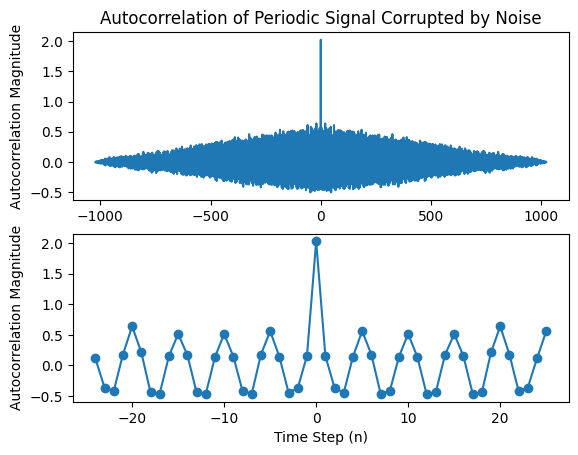

In [9]:
# Calculate the autocorrelation by correlating the signal with itself, and normalize by size
x_autocorr = signal.correlate(x, x) / x.size

# Plotting
plt.figure(1)
plt.subplot(211)
plt.plot(lags, x_autocorr)
plt.title("Autocorrelation of Periodic Signal Corrupted by Noise")
plt.ylabel("Autocorrelation Magnitude")
plt.subplot(212)
plt.plot(lags[1024-int(zoom_cycles / (2 * f)):1024+int(zoom_cycles / (2 * f))], x_autocorr[1024-int(zoom_cycles / (2 * f)):1024+int(zoom_cycles / (2 * f))], '-o')
plt.ylabel("Autocorrelation Magnitude")
plt.xlabel("Time Step (n)")
plt.show()

From the autocorrelation graph, we can clearly see that the signal is periodic.  Additionally, by counting the number of timesteps per repetitoin, we can see that the signal takes 5 timesteps to travel from peak to peak, which tells us that the frequency of the periodic signal is 0.2 cycles per sample.  We can show this holds by recreating the above setup, but using a signal with a different frequency, say $f^\prime = 0.1$ cycles per sample.

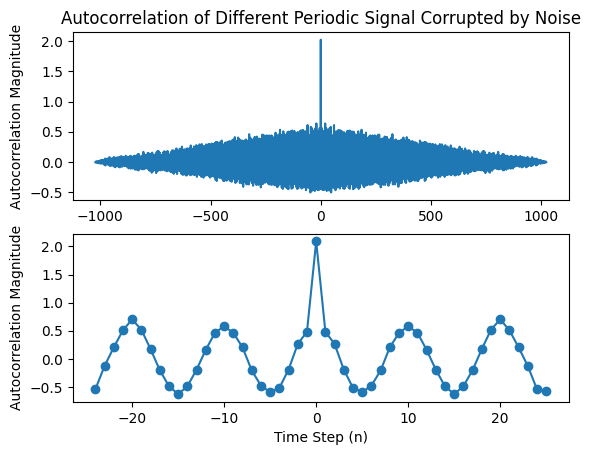

In [10]:
f_prime = 0.1
x_prime = np.cos(2 * np.pi * f_prime * n) + v
x_prime_autocorr = signal.correlate(x_prime, x_prime) / x_prime.size

# Plotting
plt.figure(2)
plt.subplot(211)
plt.plot(lags, x_autocorr)
plt.title("Autocorrelation of Different Periodic Signal Corrupted by Noise")
plt.ylabel("Autocorrelation Magnitude")
plt.subplot(212)
plt.plot(lags[1024-int(zoom_cycles / (2 * f)):1024+int(zoom_cycles / (2 * f))], x_prime_autocorr[1024-int(zoom_cycles / (2 * f)):1024+int(zoom_cycles / (2 * f))], '-o')
plt.ylabel("Autocorrelation Magnitude")
plt.xlabel("Time Step (n)")
plt.show()

Now the signal takes 10 timesteps to travel from peak to peak, meaning the frequency is 0.1 cycles per sample.  This shows that the autocorrelation of a signal of a periodic signal corrupted by noise allows us to extract the frequency of that periodic signal.

# Exercise 3

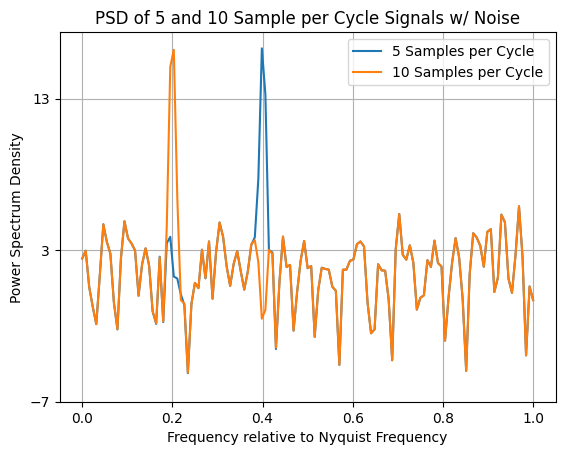

In [17]:
fig, ax = plt.subplots(1,1)
ax.psd(x)
ax.psd(x_prime)
plt.title("PSD of 5 and 10 Sample per Cycle Signals w/ Noise")
plt.xlabel("Frequency relative to Nyquist Frequency")
plt.ylabel("Power Spectrum Density")
plt.legend(["5 Samples per Cycle", "10 Samples per Cycle"])
plt.show()

In a PSD, we see the power of the various frequencies from 0 to half the sampling frequency (the Nyquist frequency).  As we can see above, there is a roughly constant component due to the white noise added to the signal (white noise contains all frequencies in equal proportions).  For the 5 samples per cycle signal, $f = f_s/5$.  Finding this frequency relative to half the sampling frequency, we find $f / (f_s / 2) = 0.4$, which is exactly where we see an increase in power.  Similarly, for the second signal with frequency $f^\prime = f_s/10$, we find a spike at 0.2, which is exactly where we would expect to see it, as it is half the frequency.  Thus by looking at the PSD, we can extract the frequencies that compose a signal.

# Exercise 4

In [19]:
n = np.array(list(range(samples)))
signal = np.cos(2 * np.pi * f * n)

data = amplitude / 2 * (noise + signal) # Weight the noise and the signal equally
write("gaussian_and_signal_equal.wav", Fs, data.astype(np.int16))

data_2 = amplitude / 11 * (noise + 10 * signal) # Favor signal over noise (10:1)
write("gaussian_and_signal_scaled.wav", Fs, data_2.astype(np.int16))

# Just for fun, try to play a chord
C_freq = 261.63
E_freq = 329.63
G_freq = 392

C_sample_freq = C_freq / Fs
E_sample_freq = E_freq / Fs
G_sample_freq = G_freq / Fs

C_signal = np.cos(2 * np.pi * C_sample_freq * n)
E_signal = np.cos(2 * np.pi * E_sample_freq * n)
G_signal = np.cos(2 * np.pi * G_sample_freq * n)

chord = amplitude / 3 * (C_signal + E_signal + G_signal)
write("chord.wav", Fs, chord.astype(np.int16))

Although it was hard to pick out the signal with all of the noise in the first signal, by scaling the noise down, one could start to hear the tone.